<a href="https://colab.research.google.com/github/SaharshBharadhwaj1/CybersecurityThreats-PreventingInsiderAttacks/blob/main/Global_Cybersecurity_Threats_Saharsh_Bharadhwaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Slideshow Link:** https://docs.google.com/presentation/d/17vCgKuWbUPXVo1bHUsCM05qlB3G3khXu_cCszyZeu04/edit?usp=sharing

**Import Python Modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Clean Dataset, filtering to insider attacks**

In [ ]:
# Import original dataset
original_df = pd.read_csv("CyberSecurity_Threats.csv")

# Clean column names to avoid errors
original_df.columns = original_df.columns.str.strip()

# Filter only insider attacks
df = original_df[original_df["Attack Source"] == "Insider"]

print(f"Number of insider incidents: {len(df)} / {len(original_df)}")

Number of insider incidents: 752 / 3000


**Graph #1: Security Vulnerability Types Exploited by Insiders Bar Chart**

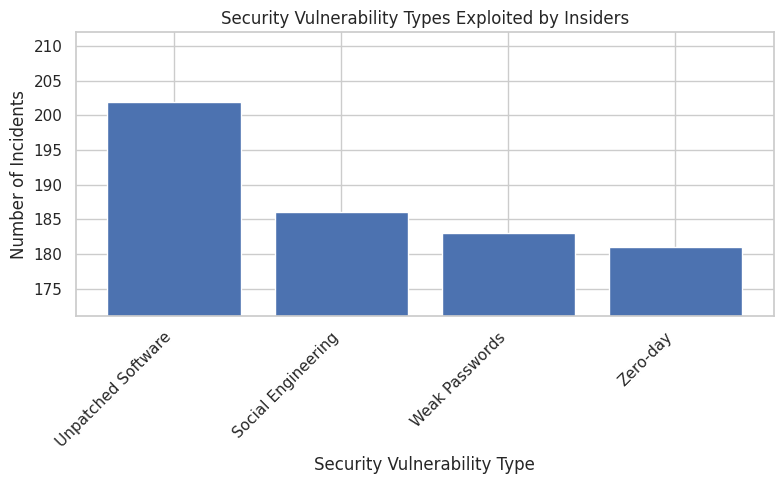

In [ ]:

counts = df["Security Vulnerability Type"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values)
plt.xlabel("Security Vulnerability Type")
plt.ylabel("Number of Incidents")
plt.title("Security Vulnerability Types Exploited by Insiders")
plt.xticks(rotation=45, ha="right")

y_min = counts.min() - 10
y_max = counts.max() + 10
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


**Graph #2: Defense Mechanisms Bypassed by Insiders Bar Chart**

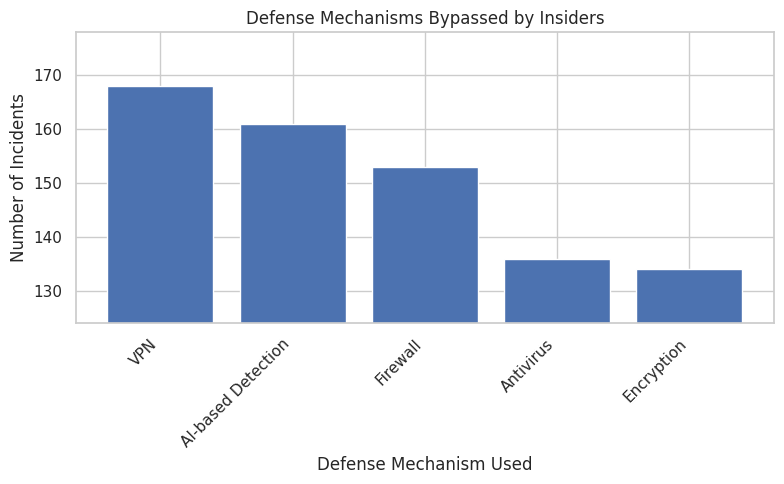

In [ ]:

counts = df["Defense Mechanism Used"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values)
plt.xlabel("Defense Mechanism Used")
plt.ylabel("Number of Incidents")
plt.title("Defense Mechanisms Bypassed by Insiders")
plt.xticks(rotation=45, ha="right")

y_min = counts.min() - 10
y_max = counts.max() + 10
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

**Graph #3: Insider Attacks: Vulnerability vs Defense Mechanism Heat Map**

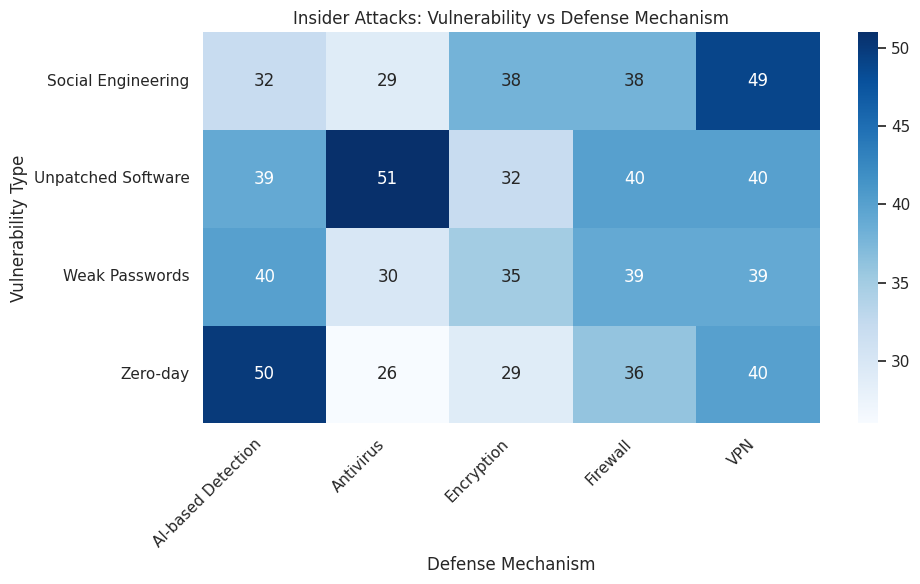

In [ ]:
heatmap_data = pd.crosstab(df["Security Vulnerability Type"],
                           df["Defense Mechanism Used"])
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")

plt.title("Insider Attacks: Vulnerability vs Defense Mechanism")
plt.xlabel("Defense Mechanism")
plt.ylabel("Vulnerability Type")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


**Graph #4: Insider Target Mechanisms vs. Outsiders Bar Chart**

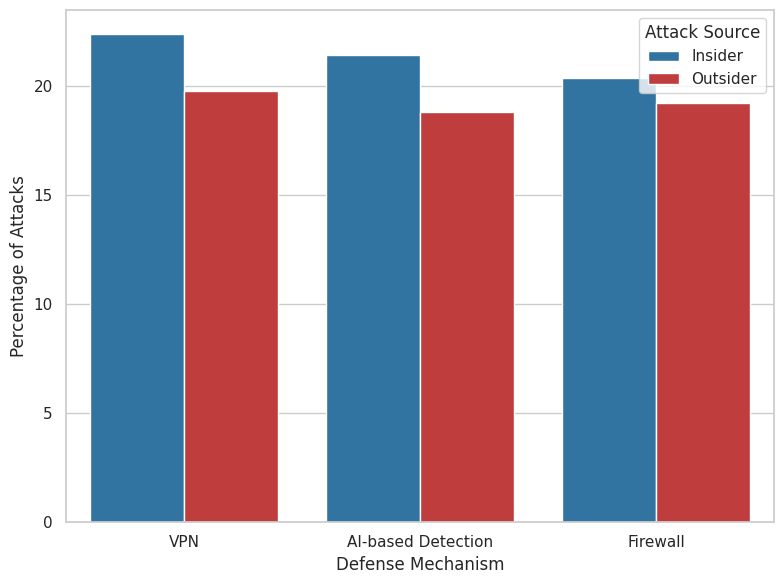

In [ ]:

original_df['Is_Insider'] = original_df['Attack Source'].apply(lambda x: 'Insider' if x == 'Insider' else 'Outsider')


defense_props = original_df.groupby('Is_Insider')['Defense Mechanism Used'].value_counts(normalize=True).unstack().T * 100
defense_props = defense_props.reset_index()
defense_props_melted = defense_props.melt(id_vars='Defense Mechanism Used', var_name='Source', value_name='Percentage')


selected_mechanisms = ['VPN', 'AI-based Detection', 'Firewall']
filtered_data = defense_props_melted[defense_props_melted['Defense Mechanism Used'].isin(selected_mechanisms)]

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.barplot(x='Defense Mechanism Used', y='Percentage', hue='Source', data=filtered_data,
            order=selected_mechanisms, palette=['#1f77b4', '#d62728'])

# plt.title('Insider Target Mechanisms vs. Outsiders)
plt.ylabel('Percentage of Attacks', fontsize=12)
plt.xlabel('Defense Mechanism', fontsize=12)
plt.legend(title='Attack Source')

plt.tight_layout()
plt.show()